In [23]:
%load_ext autoreload
%autoreload 2

import numpy as np
import helpers as hp
import implementations as impl

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
# Load data

x_train, x_test, y_train, train_ids, test_ids = hp.load_csv_data("data/")

In [27]:
np.sum(y_train[y_train == -1])

-299160

In [5]:
import src.features.build_features as bf

x, idx = bf.less_than_percent_nans(x_train, 90)

In [6]:
idx.shape

(99,)

In [8]:
idx

array([ 11,  14,  22,  55, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       119, 120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
       160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
       173, 174, 175, 176, 177, 178, 180, 182, 183, 184, 185, 186, 187,
       188, 189, 190, 191, 194, 195, 196, 197, 203, 204, 205, 206, 207,
       208, 209, 210, 211, 212, 213, 214, 215])

In [16]:
inan_percentage_per_column = np.isnan(x_train).sum(axis=0) / len(x_train)

In [22]:
idx = np.arange(0, len(y_train))[(y_train == 1).squeeze()]
np.unique(y_train[idx])

array([1])

In [17]:
inan_percentage_per_column.shape

(321,)

In [ ]:
i

In [14]:
len(x_train)

328135

In [3]:
y_train = np.expand_dims(y_train, 1)
y_train = y_train.reshape((y_train.shape[0],1))

In [4]:
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape) 
print("x_test shape: ", x_test.shape)

x_train shape:  (328135, 320)
y_train shape:  (328135, 1)
x_test shape:  (109379, 320)


In [5]:
# Build train data

import src.utils.constants as c
import src.features.build_features as bf
x_train_nonans, removed_cols = bf.build_train_features(data=x_train, percentage=c.PERCENTAGE_NAN)

In [6]:
# PARAMETERS

lambda_ = 0.1                                      # regularization parameter
max_iters = 10                                     # max number of iterations 
threshold = 1e-8                                   # threshold for stopping criterion
gamma = 0.4                                        # step size
initial_w = np.zeros((x_train_nonans.shape[1], 1)) # initial weights

In [7]:
# Mean squared error gradient descent
w_mean_squared_error_gd, loss_mean_squared_error_gd = impl.mean_squared_error_gd(y_train, x_train_nonans, initial_w, max_iters, gamma)

rmse_tr = np.sqrt(2 * loss_mean_squared_error_gd)

print("Mean squared error gradient descent: W: {w}, Loss:{loss}".format(w=w_mean_squared_error_gd, loss=loss_mean_squared_error_gd))
print("RMSE train: {rmse_tr}".format(rmse_tr=rmse_tr))

Mean squared error gradient descent: W: [[ 1.03434150e+15]
 [ 1.03434119e+15]
 [ 6.61042706e+14]
 [ 1.03434119e+15]
 [ 1.03434073e+15]
 [ 1.03422695e+15]
 [ 1.03427814e+15]
 [-1.13566882e+17]
 [-1.13566882e+17]
 [ 1.03434150e+15]
 [ 1.03434150e+15]
 [ 1.03434150e+15]
 [ 1.03434147e+15]
 [ 1.03434145e+15]
 [ 1.03434151e+15]
 [ 1.03434150e+15]
 [ 1.03434150e+15]
 [ 1.03434150e+15]
 [ 1.03434147e+15]
 [ 1.03434150e+15]
 [ 1.03434150e+15]
 [ 1.03434146e+15]
 [ 1.03434142e+15]
 [ 1.03434141e+15]
 [ 1.03433810e+15]
 [ 1.03433787e+15]
 [ 1.03433838e+15]
 [ 1.03434149e+15]
 [ 1.03434148e+15]
 [ 1.03434145e+15]
 [ 1.03434147e+15]
 [ 1.03434143e+15]
 [ 1.03434149e+15]
 [ 1.03434149e+15]
 [ 1.03434147e+15]
 [ 1.03434146e+15]
 [ 1.03434144e+15]
 [ 1.03434145e+15]
 [ 1.03434147e+15]
 [ 1.03434145e+15]
 [ 1.03434145e+15]
 [ 1.03434145e+15]
 [ 1.03434146e+15]
 [ 1.03434145e+15]
 [ 1.03434144e+15]
 [ 1.03434140e+15]
 [ 1.03433846e+15]
 [ 1.03434147e+15]
 [ 1.03434143e+15]
 [ 1.03434128e+15]
 [ 1.03434

In [8]:
# Mean squared error stochastic gradient descent
w_mean_squared_error_sgd, loss_mean_squared_error_sgd = impl.mean_squared_error_sgd(y_train, x_train_nonans, initial_w, max_iters, gamma)

rmse_tr = np.sqrt(2 * loss_mean_squared_error_sgd)

print("Mean squared error stochastic gradient descent: W: {w}, Loss:{loss}".format(w=w_mean_squared_error_sgd, loss=loss_mean_squared_error_sgd))
print("RMSE train: {rmse_tr}".format(rmse_tr=rmse_tr))

In [ ]:
# Test Least Squares Regression using Normal Equations

w_least_squares, loss_least_squares = impl.least_squares(y_train, x_train_nonans)

rmse_tr = np.sqrt(2 * loss_least_squares)

print("Least squares: W: {w}, Loss:{loss}".format(w=w_least_squares, loss=loss_least_squares))
print("RMSE train: {rmse_tr}".format(rmse_tr=rmse_tr))

In [ ]:
# Test Ridge Regression using Normal Equations

w_ridge_regression, loss_ridge_regression = impl.ridge_regression(y_train, x_train_nonans, lambda_)

rmse_tr = np.sqrt(2 * loss_ridge_regression)

print("Ridge regression: W: {w}, Loss:{loss}".format(w=w_ridge_regression, loss=loss_ridge_regression))
print("RMSE train: {rmse_tr}".format(rmse_tr=rmse_tr))

In [ ]:
# Test Logistic Regression using gd

w_log_regression, loss_log_regression = impl.logistic_regression(y_train, x_train_nonans, initial_w, max_iters, gamma)

rmse_tr = np.sqrt(2 * loss_log_regression)

print("Logistic regression: W: {w}, Loss:{loss}".format(w=w_log_regression, loss=loss_log_regression))
print("RMSE train: {rmse_tr}".format(rmse_tr=rmse_tr))

Logistic regression: W: [[ 0.01982394]
 [ 0.01982394]
 [ 0.01278254]
 [ 0.01982394]
 [ 0.01982393]
 [ 0.01982175]
 [ 0.01982272]
 [-2.17659702]
 [-2.17659702]
 [ 0.01982394]
 [ 0.01982394]
 [ 0.01982394]
 [ 0.01982394]
 [ 0.01982394]
 [ 0.01982394]
 [ 0.01982394]
 [ 0.01982394]
 [ 0.01982394]
 [ 0.01982394]
 [ 0.01982394]
 [ 0.01982394]
 [ 0.01982394]
 [ 0.01982394]
 [ 0.01982394]
 [ 0.01982386]
 [ 0.01982387]
 [ 0.01982388]
 [ 0.01982394]
 [ 0.01982394]
 [ 0.01982394]
 [ 0.01982394]
 [ 0.01982394]
 [ 0.01982394]
 [ 0.01982394]
 [ 0.01982394]
 [ 0.01982394]
 [ 0.01982394]
 [ 0.01982394]
 [ 0.01982394]
 [ 0.01982394]
 [ 0.01982394]
 [ 0.01982394]
 [ 0.01982394]
 [ 0.01982394]
 [ 0.01982394]
 [ 0.01982394]
 [ 0.01982389]
 [ 0.01982394]
 [ 0.01982394]
 [ 0.01982394]
 [ 0.01982394]
 [ 0.01982394]
 [ 0.01982394]
 [ 0.01982394]
 [ 0.01982394]
 [ 0.0198239 ]
 [ 0.01982392]
 [ 0.01982394]
 [ 0.01982282]
 [ 0.01982302]
 [ 0.01982394]
 [ 0.01982394]
 [ 0.01982394]
 [ 0.01982394]
 [ 0.01982394]
 

In [ ]:
# Test Regularized Logistic Regression using gd

w_reg_log_regression, loss_reg_log_regression = impl.reg_logistic_regression(y_train, x_train_nonans, lambda_, initial_w, max_iters, gamma)

rmse_tr = np.sqrt(2 * loss_reg_log_regression)

print("Logistic regression: W: {w}, Loss:{loss}".format(w=w_reg_log_regression, loss=loss_reg_log_regression))
print("RMSE train: {rmse_tr}".format(rmse_tr=rmse_tr))

In [ ]:
# Cross validation

import src.model.Models as model
import src.model.train_model as tm

kwargs = {
    "lambda_": lambda_,
    "initial_w": initial_w,
    "max_iters": max_iters,
    "gamma": gamma,
}

accuracy, f1, w = tm.run_cross_validation(
    x=x_train_nonans,
    y=y_train,
    k=6,
    algorithm=impl.reg_logistic_regression,
    model=model.Models.LOGISTIC,
    **kwargs,
)

print("Accuracy: {accuracy}, F1: {f1}, W: {w}".format(accuracy=accuracy, f1=f1, w=w))

Accuracy: 0.0, F1: 0.0, W: [[ 0.00759127]
 [ 0.00759127]
 [ 0.00493151]
 [ 0.00759127]
 [ 0.00759126]
 [ 0.00759043]
 [ 0.0075908 ]
 [-0.8334944 ]
 [-0.8334944 ]
 [ 0.00759127]
 [ 0.00759127]
 [ 0.00759127]
 [ 0.00759127]
 [ 0.00759127]
 [ 0.00759127]
 [ 0.00759127]
 [ 0.00759127]
 [ 0.00759127]
 [ 0.00759127]
 [ 0.00759127]
 [ 0.00759127]
 [ 0.00759127]
 [ 0.00759127]
 [ 0.00759127]
 [ 0.00759123]
 [ 0.00759124]
 [ 0.00759124]
 [ 0.00759127]
 [ 0.00759127]
 [ 0.00759127]
 [ 0.00759127]
 [ 0.00759127]
 [ 0.00759127]
 [ 0.00759127]
 [ 0.00759127]
 [ 0.00759127]
 [ 0.00759127]
 [ 0.00759127]
 [ 0.00759127]
 [ 0.00759127]
 [ 0.00759127]
 [ 0.00759127]
 [ 0.00759127]
 [ 0.00759127]
 [ 0.00759127]
 [ 0.00759127]
 [ 0.00759125]
 [ 0.00759127]
 [ 0.00759127]
 [ 0.00759127]
 [ 0.00759127]
 [ 0.00759127]
 [ 0.00759127]
 [ 0.00759127]
 [ 0.00759127]
 [ 0.00759126]
 [ 0.00759126]
 [ 0.00759127]
 [ 0.00759074]
 [ 0.00759088]
 [ 0.00759127]
 [ 0.00759127]
 [ 0.00759127]
 [ 0.00759127]
 [ 0.00759127

In [ ]:
# Create submission

import src.utils.functions as utils

utils.create_submission(
    x_test=x_test,
    w=w_log_regression,
    removed_cols=removed_cols,
    model=model.Models.LOGISTIC,
    filename="submission.csv"
)

In [ ]:
# Quick check on positive/negative predictions

import os

pred = np.genfromtxt(
    os.path.join(c.MODELS_PATH, "sub.csv"), delimiter=",", skip_header=1
)
pred = pred[:, 1]

print("Positive predictions: ", np.sum(pred == 1))
print("Negative predictions: ", np.sum(pred == -1))

In [3]:
import numpy as np

In [27]:
w = np.array([[8.76522923],
       [0.86506734],
       [5.69235577],
       [4.33171251],
       [3.56426327],
       [9.8141147 ],
       [1.42076856],
       [5.41672089],
       [2.93616034],
       [7.39168897],
       [5.53130168],
       [9.82754835],
       [1.97734141],
       [3.78287525],
       [0.65237145],
       [0.13710305],
       [2.90800657],
       [9.96409967],
       [7.98175337],
       [5.70097142],
       [8.56948365],
       [2.82828561],
       [1.12338554],
       [8.10651067],
       [1.37055858],
       [5.54624572],
       [2.53943355],
       [3.1920503 ],
       [3.41832204],
       [6.8935059 ],
       [5.85126498],
       [2.91798474],
       [8.13160312],
       [3.4426894 ],
       [7.26558804],
       [8.92256591],
       [5.72854855],
       [5.27802669],
       [6.82467101],
       [1.40398676],
       [3.39746044],
       [3.45004313],
       [0.40030662],
       [6.79904335],
       [1.62727657],
       [5.63123945],
       [3.74247369],
       [1.43584992],
       [7.22515206],
       [2.75877868],
       [3.96891011],
       [3.37321863],
       [8.86029401],
       [8.67672726],
       [1.86298163],
       [8.585368  ],
       [7.85983762],
       [6.91132909],
       [0.36194779],
       [8.26831289],
       [6.48110822],
       [8.93858705],
       [3.60878804],
       [0.89885582],
       [3.2461084 ],
       [0.45960857],
       [5.36864282],
       [4.77796986],
       [5.49690253],
       [4.81025751],
       [6.67499121],
       [4.45435195],
       [5.60915116],
       [9.62041904],
       [9.12182561],
       [2.91895513],
       [7.42770924],
       [4.24318136],
       [8.0346902 ],
       [5.16701967],
       [1.08866948],
       [7.96879175],
       [4.09238746],
       [1.17246777],
       [9.63464856],
       [9.02396643],
       [6.83633022],
       [9.81462457],
       [8.75379981],
       [5.01339949],
       [6.9646969 ],
       [9.8946318 ],
       [7.37295463],
       [2.05017762],
       [9.98184123],
       [9.66883884],
       [1.38187431],
       [5.09679218],
       [9.11643777],
       [1.71020418],
       [5.10697642],
       [8.81908777],
       [9.6562305 ],
       [3.78478312],
       [2.29250509],
       [3.86207739],
       [1.57588948],
       [1.84220767],
       [5.0517278 ],
       [1.44571291],
       [2.83932104],
       [8.13162607],
       [1.42438573],
       [3.26628925],
       [7.54787891],
       [5.70053811],
       [3.81280707],
       [8.69678286],
       [7.07482599],
       [8.49156119],
       [9.09946185],
       [5.69752866],
       [8.22124443],
       [9.33340036],
       [2.42326257],
       [8.50170661],
       [4.59635767],
       [6.58598193],
       [5.79969122],
       [8.98965905],
       [4.31062739],
       [6.42821417],
       [9.02884641]])
     

In [28]:
w.shape

(133, 1)

In [54]:
import src.features.build_features as bf
import src.utils.constants as c

x_train_standardized, y, calculated_cols_idxs, more_than_nan_idxs = bf.build_train_features(
    x=x_train,
    y=y_train,
    percentage=75,
    fill_nans="random",
    balance=True,
    balance_scale=1
)

In [55]:
x_test_std = bf.build_test_features(
    x=x_test,
    idx_calc_columns=calculated_cols_idxs,
    idx_nan_percent=more_than_nan_idxs
)

In [57]:
import src.model.predict_model as pm

y_pred = pm.compute_predictions_linear(x_train_standardized, w)

(array([52821.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,  5129.]),
 array([-1.  , -0.98, -0.96, -0.94, -0.92, -0.9 , -0.88, -0.86, -0.84,
        -0.82, -0.8 , -

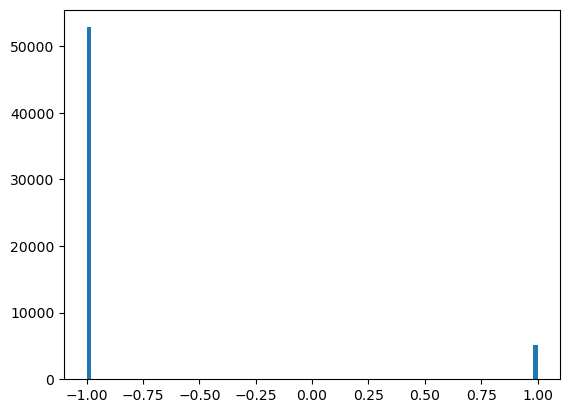

In [58]:
import matplotlib.pyplot as plt

plt.hist(y_pred, bins=100)

In [36]:
from src.model.Models import Models

In [38]:
Models.LINEAR

<Models.LINEAR: 'linear'>

In [59]:
import src.utils.functions as utilsf

utilsf.create_submission(
    x=x_test,
    ids=test_ids,
    w=w,
    model=Models.LINEAR,
    idx_calc_columns=calculated_cols_idxs,
    idx_nan_percent=more_than_nan_idxs,
    fill_nans="random",
    filename="submission.csv"
)

In [60]:
import os

y_test = np.genfromtxt(
    os.path.join("./models", "submission.csv"),
    delimiter=",",
    skip_header=1,
    dtype=int,
    usecols=1,
)

In [61]:
y_test.shape

(109379,)

(array([99348.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0., 10031.]),
 array([-1.  , -0.98, -0.96, -0.94, -0.92, -0.9 , -0.88, -0.86, -0.84,
        -0.82, -0.8 , -

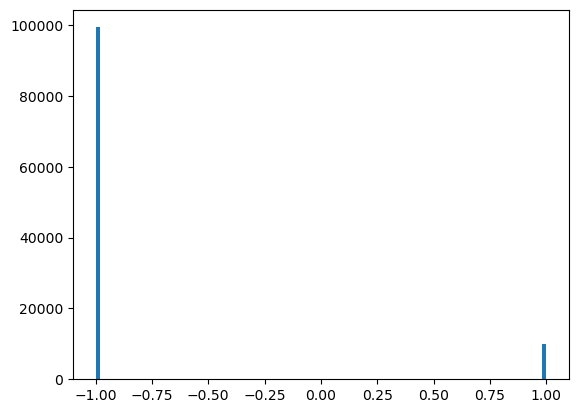

In [62]:
plt.hist(y_test, bins=100)

In [64]:
test_idx_2 = np.genfromtxt(
    os.path.join("./models", "submission.csv"),
    delimiter=",",
    skip_header=1,
    dtype=int,
    usecols=0,
)

In [65]:
test_idx_2.shape

(109379,)

In [67]:
test_ids.shape

(109379,)

In [68]:
y_test.shape

(109379,)

In [70]:
x_test.shape

(109379, 320)

In [71]:
test_ids[-1]

45

In [72]:
np.unique(test_idx_2).shape

(53,)

In [73]:
np.unique(test_ids).shape

(53,)

In [75]:
np.unique(test_ids == test_idx_2)

array([ True])

In [28]:
from src.evaluation import *

evaluation.compute_accuracy(y_test, y_pred)

NameError: name 'y_test' is not defined